# Agglomerative Clustering

In this Notebook, we will be performing an `Agglomerative Clustering` on the `Credit Card Dataset`.

In [30]:
import numpy as np
import pandas as pd

import sklearn.preprocessing as pp
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

## 1. Import the Dataset

In [17]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 2. Data Preprocessing

In this section, we will prepare the dataset for the clustering process in the further sections.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### 2.1 Fill NULL Values

In [19]:
# Fill the null values in Minimum Payment with the average of the column

df['MINIMUM_PAYMENTS'].fillna(value=df['MINIMUM_PAYMENTS'].mean(), inplace = True)

In [20]:
# Fill the null values in Credit Limit with the average of the column

df['CREDIT_LIMIT'].fillna(value=df['CREDIT_LIMIT'].mean(), inplace = True)

### 2.2 Drop the ID Column

The `ID` column is not useful for Machine learning, and would only come in the way, so we remove this.

In [21]:
df = df.drop('CUST_ID', axis = 1) 

### 2.3 Log Transformations

Many of the features have values that are either `1` or `0`. However the features that deal with dollar figures vary quite a bit. So we can choose to log transform these values to reduce the scale into a normal distribution. It also helps with scaling and grouping the data when analyzing the clusters.

In [22]:
cols = [
    'BALANCE',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'CASH_ADVANCE_TRX',
    'PURCHASES_TRX',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'MINIMUM_PAYMENTS',
]

# We add 1 for each value to avoid "inf" values
df[cols] = np.log(1 + df[cols])

In [23]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.222222,12
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,12
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12


### 2.4 Normalize and Standardize the values

In [24]:
df_columns = df.columns.tolist()

In [25]:
# Scaling

scaler = pp.StandardScaler()
df = scaler.fit_transform(df)

In [26]:
# Normalization

df = pd.DataFrame(
    pp.normalize(df),
    columns = df_columns
)

In [27]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.372087,-0.077008,-0.035051,-0.304744,0.121788,-0.287345,-0.248988,-0.209523,-0.218369,-0.208501,-0.250093,-0.178912,-0.446796,-0.254543,-0.263384,-0.162253,0.111353
1,0.231440,0.032762,-0.409714,-0.240750,-0.265228,0.372869,-0.297985,-0.165524,-0.223654,0.139989,0.191363,-0.336387,0.225849,0.259760,0.212336,0.057128,0.087969
2,0.199784,0.125461,0.145475,0.257184,-0.263343,-0.225390,0.307511,0.647415,-0.222064,-0.163545,-0.196170,0.118144,0.244626,-0.028890,0.100882,-0.127270,0.087344
3,0.119529,-0.194597,0.158344,0.242210,-0.208087,0.107994,-0.194056,-0.076411,-0.175470,-0.049544,-0.023590,-0.167368,0.193298,-0.796410,0.131621,-0.100566,0.069017
4,0.091097,0.173988,-0.237930,-0.038388,-0.365200,-0.312569,-0.340574,-0.134104,-0.307955,-0.226803,-0.272046,-0.293736,-0.411377,-0.021822,-0.127296,-0.176496,0.121127


## 3. Model

In [28]:
# Initializing the model

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [29]:
# Fit the model on the data frame

model.fit(df)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

## 4. Plotting Dendrogram

In [33]:
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)

In [34]:
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

In [35]:
linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

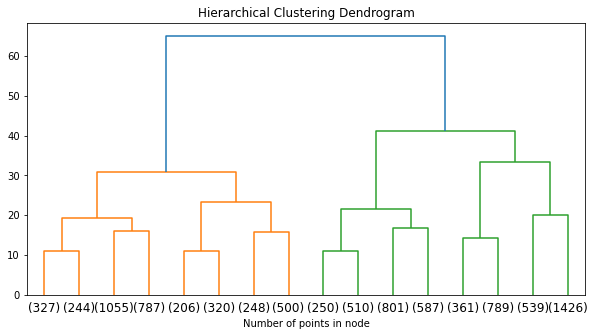

In [81]:
# Plot the corresponding dendrogram

dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Number of points in node")
plt.rcParams['figure.figsize'] = [9, 5]
plt.show()